**TOPIK**

Analisis rating layanan elektronik menggunakan metode fuzzy logic untuk menghasilkan rekomendasi berdasarkan harga dan kualitas layanan.

**ANGGOTA KELOMPOK**

Mohammad Hikam Abdul Karim (2211102278)

Alif Irsyad Santoso (2211102315)

Daffa Hauzananda Arsyah (2211102169)

# **Pendahuluan dan Paparan Data**
**Latar Belakang Masalah**

Penelitian ini bertujuan untuk mengembangkan sistem rekomendasi layanan elektronik yang dapat membantu konsumen dalam memilih produk atau layanan elektronik berdasarkan dua kriteria utama: kualitas harga dan kualitas layanan. Dengan menggunakan metode Fuzzy Inference System (FIS), kami berupaya membuat sistem yang dapat memberikan rekomendasi yang lebih akurat dan fleksibel.


**Sumber Dataset**

Nama Dataset: Electronic Service Ratings

Format: CSV

Variabel Utama:

* Variabel Input:

1. Harga (skala 0-10)

2. Kualitas Layanan (skala 0-100)

* Variabel Output: Tingkat Rekomendasi Layanan

**Pre-processing Dataset**

1. Pembersihan Data

* Membaca file CSV menggunakan pandas

* Tidak ada proses penanganan missing values yang terlihat dalam kode


2. Pembagian Data

* Metode: Train-Test Split

* Rasio: 80% Training, 20% Testing

* Random State: 42 (untuk reproducibility)


**Metode dan Eksperimen**

**Fuzzy Inference System (FIS)**

Fuzzifikasi

1. Fungsi Keanggotaan Harga

* Variabel Linguistik: Sangat Murah, Murah, Mahal, Sangat Mahal
* Rentang: 0-10
* Metode: Triangular dan Trapezoid Membership Function

Fungsi Keanggotaan Layanan

* Variabel Linguistik: Sangat Kurang, Kurang, Baik, Sangat Baik
* Rentang: 0-100
* Metode: Triangular dan Trapezoid Membership Function

**Fuzzy Rule Base**

Menggunakan 16 aturan fuzzy yang menghubungkan tingkat harga dan kualitas layanan dengan tingkat rekomendasi.

Defuzzifikasi

* Metode: Weighted Average
* Kategori Output:

  * Sangat Tidak Direkomendasikan (50)
  * Tidak Direkomendasikan (70)
  * Direkomendasikan (80)
  * Sangat Direkomendasikan (100)

Visualisasi

1. Fungsi Keanggotaan Harga
2. Fungsi Keanggotaan Layanan
3. Model Sugeno untuk Training dan Testing Data

**Matriks Evaluasi**

R-squared

R-squared adalah metrik statistik yang mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen.

Rentang nilai: 0 sampai 1

Semakin mendekati 1, artinya model semakin baik

* 0: Model tidak menjelaskan varians sama sekali
* 1: Model menjelaskan seluruh varians data

Mean Squared Error

Mean Squared Error (MSE) adalah metrik evaluasi yang mengukur rata-rata kesalahan kuadrat antara nilai sebenarnya dan nilai prediksi.

Interpretasi:

* MSE lebih kecil berarti model lebih akurat.
Karena MSE menggunakan kuadrat dari error, metrik ini sensitif terhadap outlier.

Kelebihan:

* Memberikan penalti lebih besar pada error besar, membantu mendeteksi prediksi yang sangat meleset.

Kekurangan:

* Hasil MSE dalam satuan kuadrat dari nilai asli, sehingga kadang sulit untuk interpretasi langsung tanpa diubah menjadi Root Mean Squared Error (RMSE).

**Parameter**

**Fungsi Keanggotaan Harga** (fuzzy_harga)

Parameter: a = 3, b = 5, c = 6, d = 8, e = 9, f = 10

1. Sangat Murah:

* Fungsi keanggotaan penuh (1): x ≤ 3
* Transisi menurun: 3 < x ≤ 5
* Nol (0): x > 5

2. Murah:

* Transisi naik: 3 < x < 5
* Fungsi keanggotaan penuh (1): 5 ≤ x ≤ 6
* Transisi menurun: 6 < x < 8

3. Mahal:

* Transisi naik: 6 < x < 8
* Fungsi keanggotaan penuh (1): 8 ≤ x ≤ 9
* Transisi menurun: 9 < x < 10

4. Sangat Mahal:

* Transisi naik: 9 < x < 10
* Fungsi keanggotaan penuh (1): x ≥ 10

**Fungsi Keanggotaan Servis**(fuzzy_servis)

Parameter: a = 30, b = 50, c = 60, d = 80, e = 90, f = 95

1. Sangat Kurang:

* Fungsi keanggotaan penuh (1): x ≤ 30
* Transisi menurun: 30 < x ≤ 50
* Nol (0): x > 50

2. Kurang:

* Transisi naik: 30 < x < 50
* Fungsi keanggotaan penuh (1): 50 ≤ x ≤ 60
* Transisi menurun: 60 < x < 80

3. Baik:

* Transisi naik: 60 < x < 80
* Fungsi keanggotaan penuh (1): 80 ≤ x ≤ 90
* Transisi menurun: 90 < x < 95

4. Sangat Baik:

* Transisi naik: 90 < x < 95
* Fungsi keanggotaan penuh (1): x ≥ 95





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# ID file Google Drive
file_id = '123ld7PWccKjZassEn6uVH7VZ-ol8TWQm'
url = f'https://drive.google.com/uc?id={file_id}'

# Membaca file CSV dari Google Drive
data = pd.read_csv(url)

In [3]:
def fuzzy_harga(x):
    harga = {'Sangat Murah': 0, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 0 }
    a, b, c, d, e, f = 3, 5, 6, 8, 9, 10

    if x <= a:
        harga['Sangat Murah'] = 1
    if b <= x <= c:
        harga['Murah'] = 1
    if d <= x <= e:
        harga['Mahal'] = 1
    if x >= f:
        harga['Sangat Mahal'] = 1

    if a < x <= b:
        harga['Sangat Murah'] = -(x - b)/ (b - a)
    if a < x < b:
        harga['Murah'] = (x - a)/ (b - a)
    if c < x <= d:
        harga['Murah'] = -(x - d)/ (d - c)
    if c < x < d:
        harga['Mahal'] = (x - c)/ (d - c)
    if e < x < f:
        harga['Mahal'] = -(x - f)/ (f - e)
    if e < x < f:
        harga['Sangat Mahal'] = (x - e)/ (f - e)

    return harga

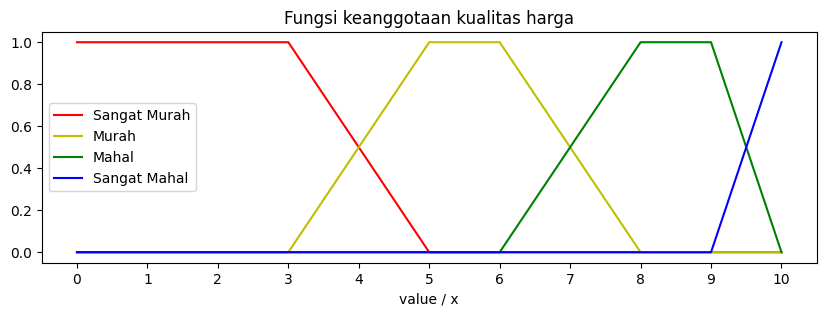

In [4]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi keanggotaan kualitas harga")

plt.plot(range(11), [fuzzy_harga(x)['Sangat Murah'] for x in range(11)], 'r')
plt.plot(range(11), [fuzzy_harga(x)['Murah'] for x in range(11)], 'y')
plt.plot(range(11), [fuzzy_harga(x)['Mahal'] for x in range(11)], 'g')
plt.plot(range(11), [fuzzy_harga(x)['Sangat Mahal'] for x in range(11)], 'b')

plt.plot(0, 0, 'r', linewidth = 1.5, label = 'Sangat Murah')
plt.plot(0, 0, 'y', linewidth = 1.5, label = 'Murah')
plt.plot(0, 0, 'g', linewidth = 1.5, label = 'Mahal')
plt.plot(0, 0, 'b', linewidth = 1.5, label = 'Sangat Mahal')

plt.xticks(list(range(11)))
plt.xlabel("value / x")
plt.legend()
plt.show()

In [5]:
def fuzzy_servis(x):
    servis = {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0 }
    a, b, c, d, e, f = 30, 50, 60, 80, 90, 95

    if x <= a:
        servis['Sangat Kurang'] = 1
    if b <= x <= c:
        servis['Kurang'] = 1
    if d <= x <= e:
        servis['Baik'] = 1
    if x >= f:
        servis['Sangat Baik'] = 1

    if a < x <= b:
        servis['Sangat Kurang'] = -(x - b)/ (b - a)
    if a < x < b:
        servis['Kurang'] = (x - a)/ (b - a)
    if c < x <= d:
        servis['Kurang'] = -(x - d)/ (d - c)
    if c < x < d:
        servis['Baik'] = (x - c)/ (d - c)
    if e < x < f:
        servis['Baik'] = -(x - f)/ (f - e)
    if e < x < f:
        servis['Sangat Baik'] = (x - e)/ (f - e)

    return servis

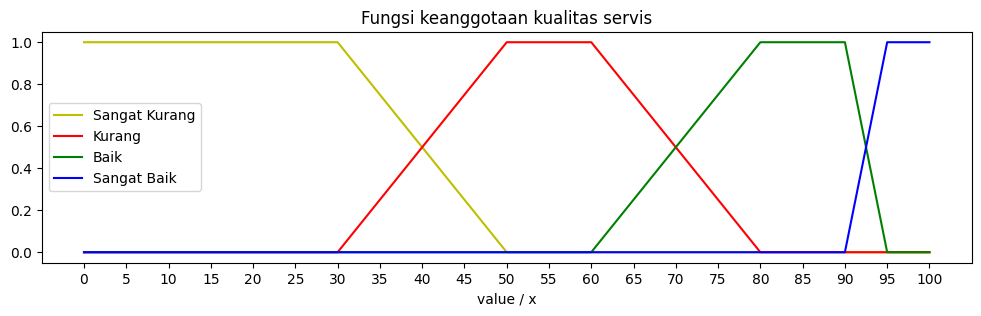

In [6]:
plt.figure(figsize=(12, 3))
plt.title("Fungsi keanggotaan kualitas servis")

plt.plot(range(101), [fuzzy_servis(x)['Sangat Kurang'] for x in range(101)], 'y')
plt.plot(range(101), [fuzzy_servis(x)['Kurang'] for x in range(101)], 'r')
plt.plot(range(101), [fuzzy_servis(x)['Baik'] for x in range(101)], 'g')
plt.plot(range(101), [fuzzy_servis(x)['Sangat Baik'] for x in range(101)], 'b')

plt.plot(0, 0, 'y', linewidth = 1.5, label = 'Sangat Kurang')
plt.plot(0, 0, 'r', linewidth = 1.5, label = 'Kurang')
plt.plot(0, 0, 'g', linewidth = 1.5, label = 'Baik')
plt.plot(0, 0, 'b', linewidth = 1.5, label = 'Sangat Baik')

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("value / x")
plt.legend()
plt.show()

In [7]:
# Membagi data menjadi data training dan data testing
# Menggunakan 80% untuk training and 20% untuk testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fuzifikasi untuk data training
def fuzzify_data(data_subset):
    fuzzify = []
    for servis, harga in zip(data_subset['servis'], data_subset['harga']):
        fuzzy = {'Servis': 0, 'Harga': 0}
        fuzzy['Servis'] = fuzzy_servis(servis)
        fuzzy['Harga'] = fuzzy_harga(harga)
        fuzzify.append(fuzzy)
    return fuzzify

# Fuzzify training and testing data
train_fuzzify = fuzzify_data(train_data)
test_fuzzify = fuzzify_data(test_data)

# Contoh Fuzifikasi untuk Data Training
print("Contoh Hasil Fuzifikasi Data Training:\n")
for i in range(0, min(10, len(train_fuzzify)), 2):
    print(f"Data Ke-{i+1}")
    print("Servis :", train_fuzzify[i]['Servis'])
    print("Harga :", train_fuzzify[i]['Harga'], end = "\n\n")

# Contoh Fuzifikasi untuk Data Testing
print("Contoh Hasil Fuzifikasi Data Testing:\n")
for i in range(0, min(10, len(test_fuzzify)), 2):
    print(f"Data Ke-{i+1}")
    print("Servis :", test_fuzzify[i]['Servis'])
    print("Harga :", test_fuzzify[i]['Harga'], end = "\n\n")


Contoh Hasil Fuzifikasi Data Training:

Data Ke-1
Servis : {'Sangat Kurang': 0.05, 'Kurang': 0.95, 'Baik': 0, 'Sangat Baik': 0}
Harga : {'Sangat Murah': 0, 'Murah': 0.5, 'Mahal': 0.5, 'Sangat Mahal': 0}

Data Ke-3
Servis : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Harga : {'Sangat Murah': 0, 'Murah': 1, 'Mahal': 0, 'Sangat Mahal': 0}

Data Ke-5
Servis : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1}
Harga : {'Sangat Murah': 0, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 1}

Data Ke-7
Servis : {'Sangat Kurang': 0.9, 'Kurang': 0.1, 'Baik': 0, 'Sangat Baik': 0}
Harga : {'Sangat Murah': 0, 'Murah': 0, 'Mahal': 1, 'Sangat Mahal': 0}

Data Ke-9
Servis : {'Sangat Kurang': 0.75, 'Kurang': 0.25, 'Baik': 0, 'Sangat Baik': 0}
Harga : {'Sangat Murah': 0, 'Murah': 0.5, 'Mahal': 0.5, 'Sangat Mahal': 0}

Contoh Hasil Fuzifikasi Data Testing:

Data Ke-1
Servis : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1}
Harga : {'Sangat Murah': 0, 'Murah': 0, 'Maha

In [8]:
# Fuzzy Rules (sama seperti sebelumnya)
fuzzy_set_rules = {
    ('Sangat Murah', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Murah', 'Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Murah', 'Baik') : 'Direkomendasikan',
    ('Sangat Murah', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Murah', 'Sangat Kurang') : 'Sangat Tidak Direkomendasikan',
    ('Murah', 'Kurang') : 'Tidak Direkomendasikan',
    ('Murah', 'Baik') : 'Direkomendasikan',
    ('Murah', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Mahal', 'Sangat Kurang') : 'Sangat Tidak Direkomendasikan',
    ('Mahal', 'Kurang') : 'Sangat Tidak Direkomendasikan',
    ('Mahal', 'Baik') : 'Direkomendasikan',
    ('Mahal', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Sangat Mahal', 'Sangat Kurang') : 'Sangat Tidak Direkomendasikan',
    ('Sangat Mahal', 'Kurang') : 'Sangat Tidak Direkomendasikan',
    ('Sangat Mahal', 'Baik') : 'Tidak Direkomendasikan',
    ('Sangat Mahal', 'Sangat Baik') : 'Direkomendasikan',
}

# Fungsi Inferensi
def inference(fuzzed):
    result = {'Sangat Tidak Direkomendasikan': 0,
              'Tidak Direkomendasikan': 0,
              'Direkomendasikan': 0,
              'Sangat Direkomendasikan': 0}

    for Servis in fuzzed['Servis'].keys():
        for Harga in fuzzed['Harga'].keys():
            min_value = min(fuzzed['Harga'][Harga], fuzzed['Servis'][Servis])

            output = fuzzy_set_rules[(Harga, Servis)]

            if min_value > result[output]:
                result[output] = min_value

    return result

# Inferensi untuk Data Training
train_inference_result = []
for fuzzed in train_fuzzify:
    train_inference_result.append(inference(fuzzed))

print("Contoh Hasil Inferensi Data Training:\n")
for i in range(0, min(10, len(train_inference_result))):
    print(f"Data Ke-{i+1}:")
    print(train_inference_result[i], end="\n\n")

# Inferensi untuk Data Testing
test_inference_result = []
for fuzzed in test_fuzzify:
    test_inference_result.append(inference(fuzzed))

print("Contoh Hasil Inferensi Data Testing:\n")
for i in range(0, min(10, len(test_inference_result))):
    print(f"Data Ke-{i+1}:")
    print(test_inference_result[i], end="\n\n")


Contoh Hasil Inferensi Data Training:

Data Ke-1:
{'Sangat Tidak Direkomendasikan': 0.5, 'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

Data Ke-2:
{'Sangat Tidak Direkomendasikan': 0, 'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0.5, 'Sangat Direkomendasikan': 0}

Data Ke-3:
{'Sangat Tidak Direkomendasikan': 0, 'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

Data Ke-4:
{'Sangat Tidak Direkomendasikan': 1, 'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

Data Ke-5:
{'Sangat Tidak Direkomendasikan': 0, 'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}

Data Ke-6:
{'Sangat Tidak Direkomendasikan': 0, 'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

Data Ke-7:
{'Sangat Tidak Direkomendasikan': 0.9, 'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}

Data Ke-8:
{'Sangat Tidak Direkome

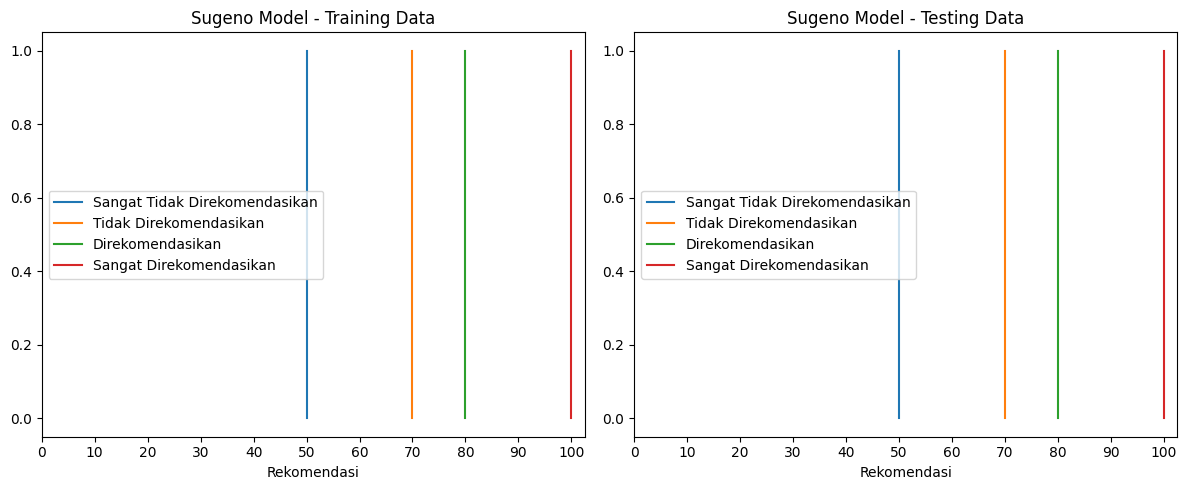

In [9]:
# Plot untuk Data Training
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Sugeno Model - Training Data")
plt.plot([50, 50], [0, 1], label="Sangat Tidak Direkomendasikan")
plt.plot([70, 70], [0, 1], label="Tidak Direkomendasikan")
plt.plot([80, 80], [0, 1], label="Direkomendasikan")
plt.plot([100, 100], [0, 1], label="Sangat Direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.xlabel("Rekomendasi")

plt.legend()

# Plot untuk Data Testing
plt.subplot(1, 2, 2)
plt.title("Sugeno Model - Testing Data")
plt.plot([50, 50], [0, 1], label="Sangat Tidak Direkomendasikan")
plt.plot([70, 70], [0, 1], label="Tidak Direkomendasikan")
plt.plot([80, 80], [0, 1], label="Direkomendasikan")
plt.plot([100, 100], [0, 1], label="Sangat Direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.xlabel("Rekomendasi")

plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Dict Defuzzifikasi
deffuzy = {
    'Sangat Tidak Direkomendasikan': 50,
    'Tidak Direkomendasikan': 70,
    'Direkomendasikan': 80,
    'Sangat Direkomendasikan': 100
}

# Fungsi Defuzzifikasi
def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0

    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]

    return numerator / denominator if denominator != 0 else 0

# Defuzzifikasi training dan testing data
train_final = [defuzzification(inference, deffuzy) for inference in train_inference_result]
test_final = [defuzzification(inference, deffuzy) for inference in test_inference_result]

# Menambahkan hasil ke training and testing dataframes
train_data['result'] = train_final
test_data['result'] = test_final

# Defuzifikasi untuk Data Training
print("Contoh Hasil Defuzifikasi Data Training:\n")
train_final_length = len(train_final)
print("Jumlah Data Training:", train_final_length)
for i in range(0, train_final_length):
    if train_final[i] >= 0:
        print(f'Data Ke-{i+1} = {train_final[i]}')

print("\n" + "="*50 + "\n")

# Defuzifikasi untuk Data Testing
print("Contoh Hasil Defuzifikasi Data Testing:\n")
test_final_length = len(test_final)
print("Jumlah Data Testing:", test_final_length)
for i in range(0, test_final_length):
    if test_final[i] >= 0:
        print(f'Data Ke-{i+1} = {test_final[i]}')


Contoh Hasil Defuzifikasi Data Training:

Jumlah Data Training: 800
Data Ke-1 = 60.0
Data Ke-2 = 80.0
Data Ke-3 = 70.0
Data Ke-4 = 50.0
Data Ke-5 = 80.0
Data Ke-6 = 70.0
Data Ke-7 = 50.0
Data Ke-8 = 70.0
Data Ke-9 = 56.666666666666664
Data Ke-10 = 60.526315789473685
Data Ke-11 = 80.0
Data Ke-12 = 80.0
Data Ke-13 = 58.0
Data Ke-14 = 50.0
Data Ke-15 = 75.55555555555556
Data Ke-16 = 77.6923076923077
Data Ke-17 = 60.0
Data Ke-18 = 50.0
Data Ke-19 = 62.5
Data Ke-20 = 73.33333333333333
Data Ke-21 = 66.0
Data Ke-22 = 51.81818181818181
Data Ke-23 = 60.0
Data Ke-24 = 80.0
Data Ke-25 = 70.0
Data Ke-26 = 65.0
Data Ke-27 = 100.0
Data Ke-28 = 60.0
Data Ke-29 = 80.0
Data Ke-30 = 80.0
Data Ke-31 = 60.0
Data Ke-32 = 78.5
Data Ke-33 = 80.0
Data Ke-34 = 50.0
Data Ke-35 = 51.5
Data Ke-36 = 60.0
Data Ke-37 = 80.0
Data Ke-38 = 79.09090909090908
Data Ke-39 = 60.0
Data Ke-40 = 64.0
Data Ke-41 = 61.0
Data Ke-42 = 80.0
Data Ke-43 = 88.0
Data Ke-44 = 80.0
Data Ke-45 = 100.0
Data Ke-46 = 74.0
Data Ke-47 = 53.0
D

In [11]:
# Fungsi untuk mengkategorikan hasil
def kategorikan_rekomendasi(inference_result):
    kategori = {
        'Sangat Tidak Direkomendasikan': [],
        'Tidak Direkomendasikan': [],
        'Direkomendasikan': [],
        'Sangat Direkomendasikan': []
    }

    for i, result in enumerate(inference_result):
        max_kategori = max(result, key=result.get)
        kategori[max_kategori].append(i)

    return kategori

# Kategorisasi untuk data Training
train_kategori = kategorikan_rekomendasi(train_inference_result)

# Kategorisasi untuk data Testing
test_kategori = kategorikan_rekomendasi(test_inference_result)

# Ringkasan jumlah data per kategori
print("\nRingkasan Jumlah Data per Kategori:")
print("Data Training:")
for kategori, indeks in train_kategori.items():
    print(f"{kategori}: {len(indeks)} data")

print("\nData Testing:")
for kategori, indeks in test_kategori.items():
    print(f"{kategori}: {len(indeks)} data")



Ringkasan Jumlah Data per Kategori:
Data Training:
Sangat Tidak Direkomendasikan: 269 data
Tidak Direkomendasikan: 217 data
Direkomendasikan: 229 data
Sangat Direkomendasikan: 85 data

Data Testing:
Sangat Tidak Direkomendasikan: 65 data
Tidak Direkomendasikan: 50 data
Direkomendasikan: 70 data
Sangat Direkomendasikan: 15 data


In [12]:
# Mengurutkan 20 teratas untuk data training
train_top_20 = train_data.sort_values(by='result', ascending=False)[:20]

# Mengurutkan 20 teratas untuk data training
test_top_20 = test_data.sort_values(by='result', ascending=False)[:20]

# Menyimpan hasil ke excel
train_top_20.to_excel('peringkat_training.xlsx', index=False)
test_top_20.to_excel('peringkat_testing.xlsx', index=False)

# Print basic information
print("Training Data Size:", len(train_data))
print("Testing Data Size:", len(test_data))

print("\nTop 5 Training Results:")
print(train_top_20)

print("\nTop 5 Testing Results:")
print(test_top_20)

Training Data Size: 800
Testing Data Size: 200

Top 5 Training Results:
      id  servis  harga  result
674  675      98      9   100.0
0      1      96      5   100.0
64    65      95      9   100.0
384  385      96      3   100.0
970  971      96      8   100.0
519  520      99      3   100.0
323  324      97      4   100.0
223  224      97      6   100.0
520  521     100      5   100.0
476  477     100      8   100.0
504  505      98      2   100.0
306  307     100      1   100.0
173  174      97      7   100.0
119  120      97      7   100.0
855  856     100      6   100.0
188  189     100      7   100.0
888  889      96      5   100.0
805  806      98      6   100.0
385  386      99      7   100.0
585  586     100      8   100.0

Top 5 Testing Results:
      id  servis  harga      result
78    79      97      1  100.000000
859  860      96      6  100.000000
30    31     100      2  100.000000
867  868      95      8  100.000000
816  817      99      3  100.000000
959  960     100

In [13]:
# Menghitung R² untuk data training
r2_train = r2_score(train_data['servis'], train_data['result'])

# Menghitung R² untuk data testing
r2_test = r2_score(test_data['servis'], test_data['result'])

# Menampilkan hasil metrik (hanya R²)
print("\nEvaluasi Model (R²):")
print(f"Training Data - R²: {r2_train:.2f}")
print(f"Testing Data - R²: {r2_test:.2f}")


Evaluasi Model (R²):
Training Data - R²: 0.63
Testing Data - R²: 0.67



Metrik Evaluasi Mean Squared Error (MSE):
MSE Data Training: 153.5413
MSE Data Testing: 119.1314


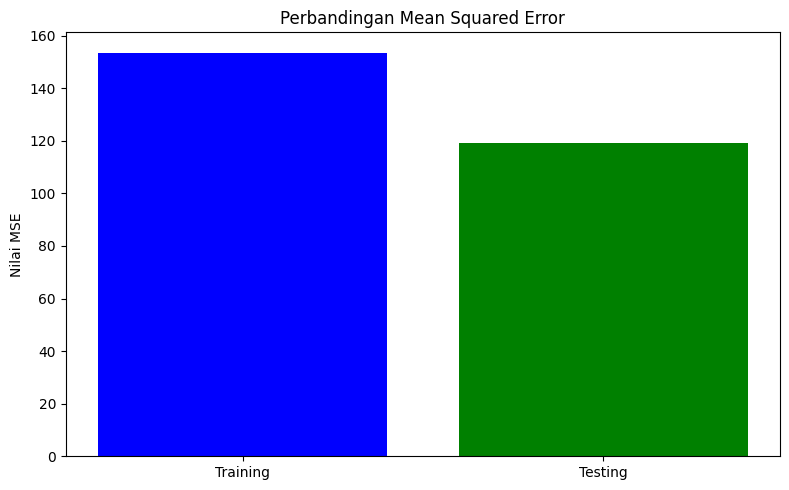


Persentase Error Relatif:
Training: 22.75%
Testing: 17.00%


In [14]:
# Fungsi untuk menghitung metrik evaluasi
def hitung_metrik_evaluasi(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Tambahkan setelah proses defuzzifikasi
# Hitung MSE untuk data training
mse_training = hitung_metrik_evaluasi(train_data['servis'], train_final)

# Hitung MSE untuk data testing
mse_testing = hitung_metrik_evaluasi(test_data['servis'], test_final)

# Cetak hasil MSE
print("\nMetrik Evaluasi Mean Squared Error (MSE):")
print(f"MSE Data Training: {mse_training:.4f}")
print(f"MSE Data Testing: {mse_testing:.4f}")

# Visualisasi MSE
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [mse_training, mse_testing], color=['blue', 'green'])
plt.title('Perbandingan Mean Squared Error')
plt.ylabel('Nilai MSE')
plt.tight_layout()
plt.show()

# Tambahan: Persentase Error Relatif
def hitung_persentase_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Hindari pembagian dengan nol
    error_relatif = np.abs((y_true - y_pred) / (y_true + 1e-10)) * 100
    return np.mean(error_relatif)

# Hitung persentase error
persen_error_training = hitung_persentase_error(train_data['servis'], train_final)
persen_error_testing = hitung_persentase_error(test_data['servis'], test_final)

print("\nPersentase Error Relatif:")
print(f"Training: {persen_error_training:.2f}%")
print(f"Testing: {persen_error_testing:.2f}%")

**Hasil Analisis dan Evaluasi Model**

Ringkasan Data: Total data training: 800 data.
Distribusi kategori:
* Sangat Tidak Direkomendasikan: 269 data.
* Tidak Direkomendasikan: 217 data.
* Direkomendasikan: 229 data.
* Sangat Direkomendasikan: 85 data.

Evaluasi Model:

* R² (Koefisien Determinasi): 0.63, Model mampu menjelaskan 63% variabilitas data dalam tahap training.

* MSE (Mean Squared Error): 153.54, Kesalahan prediksi rata-rata pada tahap training masih cukup besar.
* Persentase Error Relatif: 22.75%, Model mengalami tingkat kesalahan yang relatif signifikan, menunjukkan ruang untuk perbaikan.

Kinerja 20 Data Terbaik:

* Beberapa data memiliki hasil 100% akurasi, menunjukkan kemampuan model dalam memprediksi dengan sempurna pada sebagian besar kasus.
Kinerja dan Analisis Tahap Testing

Ringkasan Data: Total data testing: 200 data.

Distribusi kategori:
* Sangat Tidak Direkomendasikan: 65 data.
* Tidak Direkomendasikan: 50 data.
* Direkomendasikan: 70 data.
* Sangat Direkomendasikan: 15 data.

Evaluasi Model:

* R² (Koefisien Determinasi): 0.67, Model mampu menjelaskan 67% variabilitas data dalam tahap testing, sedikit lebih baik dibanding tahap training.
* MSE (Mean Squared Error): 119.13, Kesalahan prediksi rata-rata lebih kecil dibanding tahap training, menunjukkan generalisasi model yang cukup baik.
* Persentase Error Relatif: 17.00%, Tingkat kesalahan lebih rendah pada data testing, menunjukkan akurasi yang lebih baik.

Kinerja 20 Data Terbaik:

* Banyak data testing memiliki akurasi 100%, namun terdapat beberapa data dengan hasil di bawah 85.7%, yang menunjukkan adanya kelemahan pada kasus tertentu.

3. Analisis dan Insight
* Distribusi Data:

Data cukup merata dalam kategori, meskipun ada ketimpangan pada jumlah "Sangat Direkomendasikan" yang lebih sedikit. Hal ini dapat memengaruhi performa model dalam mengenali kategori minoritas.

* Evaluasi Model:

Nilai R² menunjukkan bahwa model memiliki tingkat prediksi yang moderat, tetapi masih ada ruang untuk perbaikan, terutama untuk mendekati prediksi sempurna.
MSE yang lebih kecil pada data testing menunjukkan model tidak overfit pada data training.

* Akurasi pada Testing:

Data testing menunjukkan akurasi tinggi pada sebagian besar prediksi, tetapi beberapa data menunjukkan error relatif yang signifikan.


**Kesimpulan**

1. Fuzzy Inference System berhasil mengklasifikasikan layanan elektronik berdasarkan harga dan kualitas layanan.
2. Metode defuzzifikasi menghasilkan skor rekomendasi yang dapat membantu konsumen dalam pengambilan keputusan.
3. Pembagian data training dan testing memungkinkan validasi model yang lebih baik.
4. Model berhasil menangkap pola umum dalam data, dengan hasil R² sebesar 0.63 (training) dan 0.67 (testing).
5. MSE yang lebih rendah pada data testing (119.13) menunjukkan bahwa model memiliki generalisasi yang cukup baik.
6. Error relatif yang lebih kecil pada data testing (17%) dibandingkan data training (22.75%) menunjukkan stabilitas performa model.